<a href="https://colab.research.google.com/github/Anpsujwal/Data-Science-Project-Series/blob/main/CRT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preprocessing

In [ ]:


# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('/content/data.csv')

# Data Preprocessing
# Initial exploration
print(data.head())
print(data.info())

# Check for missing values
print(data.isnull().sum())
data.dropna()


Feature Selection and Engineering

In [ ]:
# Split data into features and target
X = data.drop(['id', 'diagnosis'], axis=1)  # Drop 'id' and 'diagnosis' columns
y = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)  # Convert diagnosis to binary

# Feature Selection and Engineering
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_scaled)

# Select the top 10 best features using ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=10)
X_best = selector.fit_transform(X_imputed, y)



Machine Learning Model (SVM)

In [ ]:
# Machine Learning Model (SVM)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.3, random_state=42)

# Implement the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
# Evaluate the model
y_pred = svm_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

Results


Accuracy: 0.9707602339181286
Precision: 0.953125
Recall: 0.9682539682539683
F1-score: 0.9606299212598425
Confusion Matrix:
[[105   3]
 [  2  61]]


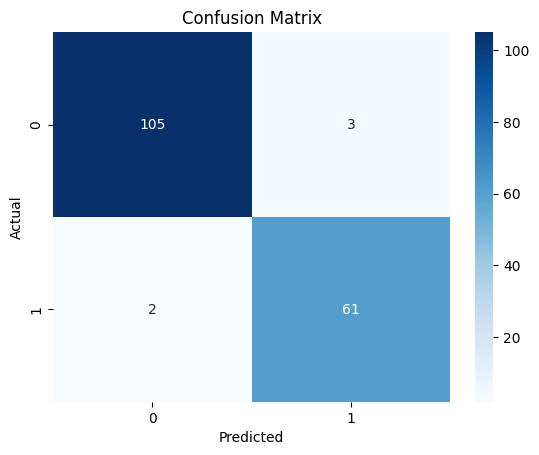

In [ ]:
# Print the results
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'Confusion Matrix:\n{confusion_mat}')

# Plot the confusion matrix
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
